In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [3]:
target_columns = ["bike_count", "log_bike_count"]
numerical_columns = ['site_id', 'latitude', 'longitude']
categorical_columns = ['counter_id', 'counter_name', 'site_name', 'coordinates', 'counter_technical_id']
date_columns = ['date', 'counter_installation_date']
all_columns = numerical_columns + categorical_columns + date_columns + target_columns

data_bike = data[all_columns]
# cosmetic changes

In [4]:
data_bike.head()

,site_id,latitude,longitude,counter_id,counter_name,site_name,coordinates,counter_technical_id,date,counter_installation_date,bike_count,log_bike_count
48321,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 02:00:00,2013-01-18,0.0,0.000000
48324,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 03:00:00,2013-01-18,1.0,0.693147
48327,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 04:00:00,2013-01-18,0.0,0.000000
48330,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 15:00:00,2013-01-18,4.0,1.609438
48333,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 18:00:00,2013-01-18,9.0,2.302585


In [5]:
data_bike.describe()

,site_id,latitude,longitude,date,counter_installation_date,bike_count,log_bike_count
count,4.968270e+05,496827.000000,496827.000000,496827,496827,496827.000000,496827.000000
mean,1.053450e+08,48.854343,2.345479,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,60.191475,3.079917
min,1.000070e+08,48.826360,2.265420,2020-09-01 01:00:00,2013-01-18 00:00:00,0.000000,0.000000
25%,1.000475e+08,48.840801,2.314440,2020-12-05 22:00:00,2018-11-29 00:00:00,5.000000,1.791759
50%,1.000562e+08,48.852090,2.353870,2021-03-08 11:00:00,2019-11-06 00:00:00,29.000000,3.401197
75%,1.000563e+08,48.864610,2.375870,2021-06-09 14:00:00,2019-12-11 00:00:00,79.000000,4.382027
max,3.000147e+08,48.891720,2.409690,2021-09-09 23:00:00,2020-11-29 00:00:00,1302.000000,7.172425
std,3.210346e+07,0.018554,0.038026,NaN,NaN,87.590566,1.659899


In [6]:
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   site_id                    496827 non-null  int64         
 1   latitude                   496827 non-null  float64       
 2   longitude                  496827 non-null  float64       
 3   counter_id                 496827 non-null  category      
 4   counter_name               496827 non-null  category      
 5   site_name                  496827 non-null  category      
 6   coordinates                496827 non-null  category      
 7   counter_technical_id       496827 non-null  category      
 8   date                       496827 non-null  datetime64[us]
 9   counter_installation_date  496827 non-null  datetime64[us]
 10  bike_count                 496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [7]:
data_bike.nunique(axis = 0)

site_id                        30
latitude                       30
longitude                      30
counter_id                     56
counter_name                   56
site_name                      30
coordinates                    30
counter_technical_id           30
date                         8974
counter_installation_date      22
bike_count                    998
log_bike_count                998
dtype: int64

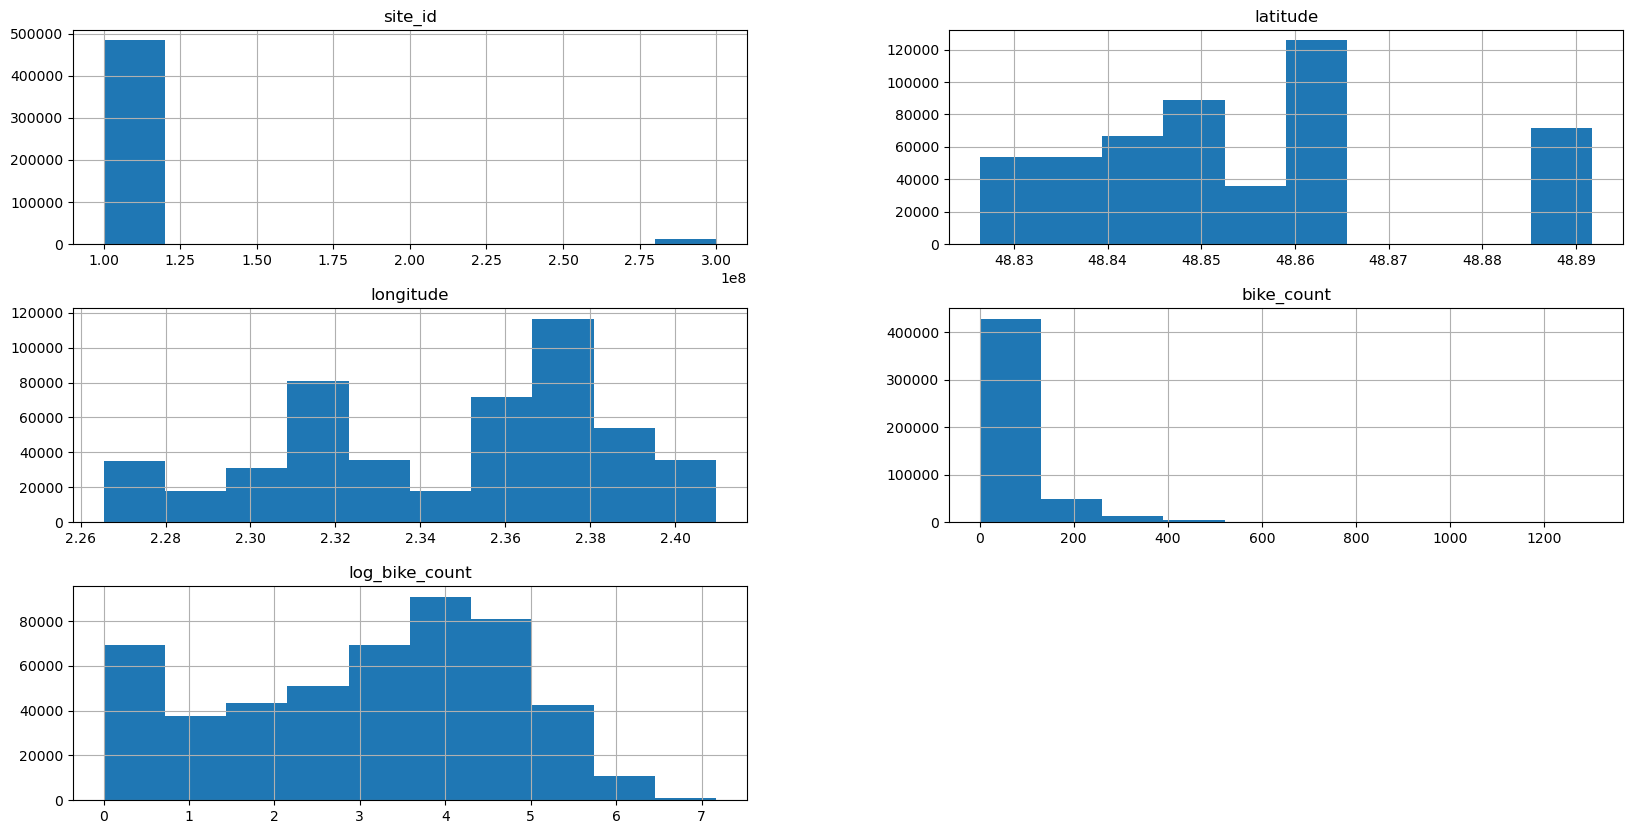

In [8]:
data_bike[numerical_columns + target_columns].hist(figsize=(20, 10));

We can already make a few comments about some of the variables:
* site_id: we notice that the site_id has a really low impact, most of them coming from the same site, might be a typo or some sort of mistake as according to nunique there is more than 2 sites used. We might have to solve this issue
* date: we do notice a few peaks, hard to identify where do they come from for now
* latitude and longitude : actually go together under coordinates, kind of repetitive but will still enable to be more precise in the predictions

In [9]:
data_bike['counter_installation_date'].value_counts()

counter_installation_date
2020-07-22    35896
2018-11-29    35896
2018-11-28    35896
2017-07-12    35896
2019-11-14    35896
2020-02-11    35895
2019-11-07    26922
2019-11-06    26922
2019-12-12    17948
2020-02-18    17948
2019-12-10    17948
2019-12-11    17948
2019-11-05    17948
2013-01-18    17948
2019-11-01    17948
2019-09-04    17948
2018-11-30    17948
2018-12-07    17936
2017-12-15    17038
2020-11-29    13154
2019-11-08     8974
2018-06-27     8974
Name: count, dtype: int64

In [10]:
data_bike['site_id'].value_counts()

site_id
100007049    17948
100036718    17948
100063175    17948
100060178    17948
100057445    17948
100057329    17948
100056336    17948
100056335    17948
100056334    17948
100056332    17948
100056331    17948
100056330    17948
100056329    17948
100056327    17948
100056226    17948
100050876    17948
100047548    17948
100047547    17948
100047546    17948
100047545    17948
100047542    17948
100036719    17948
100057380    17947
100049407    17936
100042374    17038
300014702    13154
100056223     8974
100056047     8974
100056046     8974
100044493     8974
Name: count, dtype: int64

Not useful, no explicit nor specific differentiation between any value of the columns we tried to analyze

"-U" is to say "accept by default" as we are not in the terminal

In [13]:
target_name = 'bike_count'
target = data_bike[target_name]
data = data_bike.drop(columns=[target_name, 'log_bike_count'])

In [14]:
data.dtypes

site_id                               int64
latitude                            float64
longitude                           float64
counter_id                         category
counter_name                       category
site_name                          category
coordinates                        category
counter_technical_id               category
date                         datetime64[us]
counter_installation_date    datetime64[us]
dtype: object

In [15]:
data_numeric = data.select_dtypes(include= np.number)
data_numeric

,site_id,latitude,longitude
48321,100007049,48.846028,2.375429
48324,100007049,48.846028,2.375429
48327,100007049,48.846028,2.375429
48330,100007049,48.846028,2.375429
48333,100007049,48.846028,2.375429
...,...,...,...
929175,300014702,48.839770,2.301980
929178,300014702,48.839770,2.301980
929181,300014702,48.839770,2.301980
929184,300014702,48.839770,2.301980


Let's first work on the date to add week-ends, bank-holidays, etc


In [18]:
data['date'] = pd.to_datetime(data['date'])
data.tail()

,site_id,latitude,longitude,counter_id,counter_name,site_name,coordinates,counter_technical_id,date,counter_installation_date
929175,300014702,48.83977,2.30198,300014702-353245971,254 rue de Vaugirard SO-NE,254 rue de Vaugirard,"48.83977,2.30198",Y2H20114504,2021-09-09 06:00:00,2020-11-29
929178,300014702,48.83977,2.30198,300014702-353245971,254 rue de Vaugirard SO-NE,254 rue de Vaugirard,"48.83977,2.30198",Y2H20114504,2021-09-09 10:00:00,2020-11-29
929181,300014702,48.83977,2.30198,300014702-353245971,254 rue de Vaugirard SO-NE,254 rue de Vaugirard,"48.83977,2.30198",Y2H20114504,2021-09-09 15:00:00,2020-11-29
929184,300014702,48.83977,2.30198,300014702-353245971,254 rue de Vaugirard SO-NE,254 rue de Vaugirard,"48.83977,2.30198",Y2H20114504,2021-09-09 22:00:00,2020-11-29
929187,300014702,48.83977,2.30198,300014702-353245971,254 rue de Vaugirard SO-NE,254 rue de Vaugirard,"48.83977,2.30198",Y2H20114504,2021-09-09 23:00:00,2020-11-29


In [17]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [28]:
import holidays
fr_holidays = holidays.France(years=[2020,2021])


data['Day'] = data['date'].dt.day
data['DayOfWeek'] = data['date'].dt.weekday + 1
data['Month'] = data['date'].dt.month
data['Week'] = data['date'].dt.isocalendar().week
data['BankHolidays'] = data['date'].isin(fr_holidays).astype(int)
data['Weekend'] = data['DayOfWeek'].isin([6,7]).astype(int)
data['Hour'] = data['date'].dt.hour
data['Night'] = data['Hour'].isin([20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6]).astype(int)
data['Morning'] = data['Hour'].isin([6, 7, 8, 9, 10, 11, 12]).astype(int)
data['Midday'] = data['Hour'].isin([12, 13, 14]).astype(int)
data['Evening'] = data['Hour'].isin([14, 15, 16, 17, 18, 19, 20]).astype(int)

/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_63098/1701699231.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[us] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data['BankHolidays'] = data['date'].isin(fr_holidays).astype(int)


,site_id,latitude,longitude,counter_id,counter_name,site_name,coordinates,counter_technical_id,date,counter_installation_date,...,DayOfWeek,Month,Week,BankHolidays,Weekend,Hour,Night,Morning,Midday,Evening
48321,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 02:00:00,2013-01-18,...,2,9,36,0,0,2,1,0,0,0
48324,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 03:00:00,2013-01-18,...,2,9,36,0,0,3,1,0,0,0
48327,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 04:00:00,2013-01-18,...,2,9,36,0,0,4,1,0,0,0
48330,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 15:00:00,2013-01-18,...,2,9,36,0,0,15,0,0,0,1
48333,100007049,48.846028,2.375429,100007049-102007049,28 boulevard Diderot E-O,28 boulevard Diderot,"48.846028,2.375429",Y2H15027244,2020-09-01 18:00:00,2013-01-18,...,2,9,36,0,0,18,0,0,0,1


In [33]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="paris_arrondissement_locator")

def get_arrondissement(coordinates):
    try:
        location = geolocator.reverse((coordinates), language="fr")
        if location:
            address = location.raw.get('address', {})
            return address.get('city_district') or address.get('suburb')
    except GeocoderTimedOut:
        return None  # Handle timeout
    return None

data['Arrondissement'] = data.apply(lambda row: get_arrondissement(row['coordinates']), axis=1)



In [ ]:
external_data = pd.read_csv((Path("data") / "external_data.csv"))